In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split

# 加载数据
X = np.load("mpnetemb.npy")
y = np.load("y.npy")

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 假设是一个二分类问题

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 设置早停和模型检查点
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')

In [15]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping, model_checkpoint, tensorboard], verbose=1)

Epoch 1/50
449/449 [==============================] - 3s 5ms/step - loss: 0.1527 - accuracy: 0.9423 - val_loss: 0.0739 - val_accuracy: 0.9720
Epoch 2/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9750 - val_loss: 0.0633 - val_accuracy: 0.9754
Epoch 3/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0525 - accuracy: 0.9813 - val_loss: 0.0479 - val_accuracy: 0.9834
Epoch 4/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0493 - val_accuracy: 0.9825
Epoch 5/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.9899 - val_loss: 0.0482 - val_accuracy: 0.9845
Epoch 6/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 7/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 

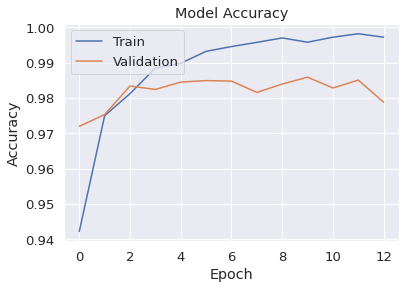

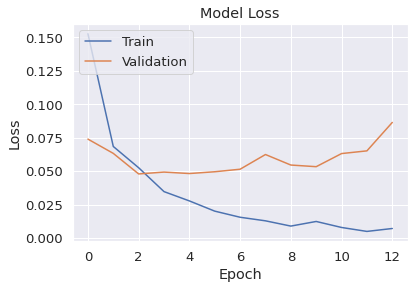

In [19]:
import matplotlib.pyplot as plt

# 绘制精度图
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 绘制损失图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 预测测试集
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int).flatten()  # 将输出四舍五入并转换为整数
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# 生成分类报告
print(classification_report(y_test, y_pred))

281/281 [==============================] - 0s 1ms/step
Accuracy: 0.9776119402985075
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4677
           1       0.99      0.96      0.98      4301

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978



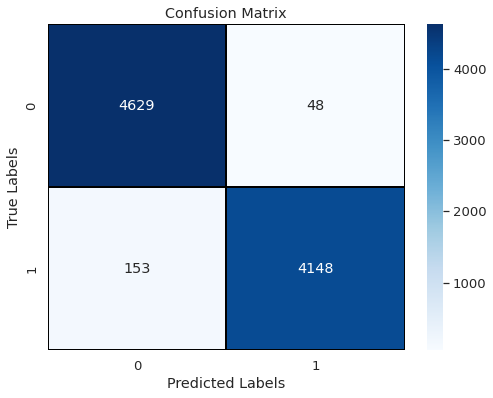

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()